# Kinetic profiles

## Electron Density



| Diagnostic | Shotfile | Signal | Area-Base space |
|---|---|---|---|
| Thomson Scattering, core | VTA | Ne_c | R,z |
| Thomson Scattering, edge | VTA | Ne_e | R,z |
| Lithium Beam | LIN | ne | $\rho_{pol}$ |
| IDA | IDA | ne | $\rho_{pol}$ |
| O-mode Reflectometer, LFS | RPS | neb_LFS | Real space, antenna LOS, Z=0.14m |
| O-mode Reflectometer, HFS | RPS | neb_HFS | Real space, antenna LOS, Z=0.07m |
| ICRH embedded X-mode Ref., above midplane | RIC | Ne_Ant1 | $\rho_{pol}$ |
| ICRH embedded X-mode Ref., midplane | RIC | Ne_Ant4 | $\rho_{pol}$ |
| ICRH embedded X-mode Ref., below midplane | RIC | Ne_Ant8 | $\rho_{pol}$ |


Don't use the reflectometers if you're a weak individual. As an example we'll use only the diagnostics that feeble-minded people can handle so nobody gets ill while using this notebook, Thomson Scattering (TS), Lithium beam, and IDA. Since TS is mapped in (R,z), a special function is included to map data to $\rho_{pol}$. Also, note that the edge and core TS systems have diferent time bases.

In [1]:
import sys
sys.path.append('ipfnlite/')
sys.path.append('/afs/ipp/aug/ads-diags/common/python/lib/')
import matplotlib.pyplot as plt
from get_vta import get_vta
from getsig import getsig
from closest import closest
import matplotlib.pyplot as plt
#plt.style.use('./Styles/darklab.mplstyle')

In [2]:
shotnr = 35647
time = 2.5
lin = getsig(shotnr, 'LIN', 'ne')
ida = getsig(shotnr, 'IDA', 'ne')
vta = get_vta(shotnr, verbose=True)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:1104: RuntimeWarning: Length of time base & 1st index of signal group "ne" not matching. Ignoring tBegin/tEnd as a precaution.
  RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(err_txt, RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:118: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(err_txt, RuntimeWarning)


trz_to_rhop:1001/1001
trz_to_rhop:801/801


In [3]:
linind = closest(lin.time, time)
idaind = closest(ida.time, time)
necind = closest(vta.time_c, time)
neeind = closest(vta.time_e, time)

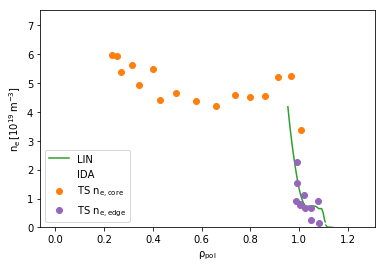

In [4]:
multiplier = 1e-19 #Data multiplier
plt.plot(lin.area.data[linind,:], lin.data[linind,:]*multiplier, 'C2', label='LIN')
plt.plot(ida.area.data[idaind,:], ida.data[idaind,:]*multiplier, 'w', label='IDA')
plt.plot(vta.rho_c[necind, :], vta.ne_c[necind, :]*multiplier, 'C1o', label=r'TS $\mathrm{n_{e,core}}$')
plt.plot(vta.rho_e[neeind, :], vta.ne_e[neeind, :]*multiplier, 'C4o', label=r'TS $\mathrm{n_{e,edge}}$')
plt.legend(loc='lower left')
plt.ylim(bottom=0)
plt.xlabel(r'$\mathrm{\rho_{pol}}$')
plt.ylabel(r'$\mathrm{n_{e}\,[10^{19}\,m^{-3}]}$')
plt.show()

## Electron Temperature 

TODO